## Scikit-Learn Example

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from __future__ import division
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
import theano
import cv2
from sklearn import preprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Make some sample data
- Make synthetic 2D data with 4 'real' clusters

In [3]:
from sklearn.datasets import make_blobs

df = pd.read_csv('2016-17_advanced.csv')
df = df[df['MP'] >= 1000]
# df = df[df['Player_ID'].duplicated()]
# df = df[df['Pos'] != 'PG']
# df = df[df['Pos'] != 'SG']
# df = df[df['Pos'] != 'SF']
# df = df[df['Pos'] != 'PF']
# df = df[df['Pos'] == 'C']
df['Player_ID'] = df['Player_ID'].astype(int)
y = np.array(df['OBPM'].values)
pid = np.array(df['Player_ID'].values)
yr = np.array(df['Yr'].values)
images = []
for i in range(len(pid)):
   images.append(cv2.imread('thumbnails/thumbnail_{0}_{1}-{2}.png'.format(pid[i], str(yr[i]-1), str(yr[i])[-2:]), 0))
X = np.array(images)
flat_exes = []
for i in range(len(X)):
    flat_exes.append(X[i].flatten())
X = np.array(flat_exes)

#### Scatterplot of sample data

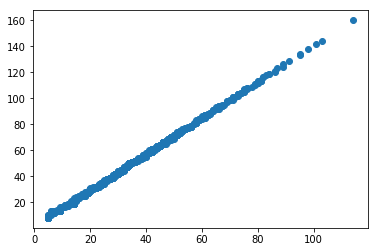

In [4]:
plt.scatter(X[:,0], X[:,1])

### Use 'Elbow' method to find optimal value of K

Text(0.5,1,'RSS versus K')

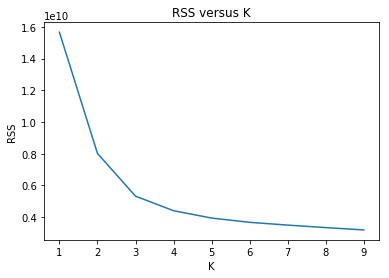

In [6]:
from sklearn.cluster import KMeans
ncluster_list = range(1,10)

def kmean_score(nclust):
    km = KMeans(nclust)
    km.fit(X)
    rss = -km.score(X)
    return rss
scores = [kmean_score(i) for i in range(1,10)]
plt.plot(range(1,10), scores)
plt.xlabel('K')
plt.ylabel('RSS')
plt.title('RSS versus K')


### Use Silhouette scores to find optimal value of K

Text(0.5,1,'Silhouette Score vs K')

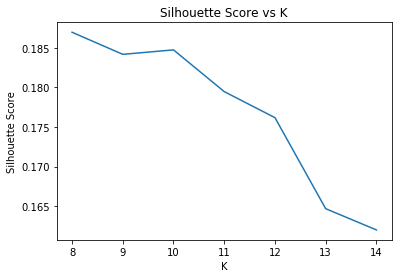

In [10]:
from sklearn.metrics import silhouette_score
def get_silhouette_score(nclust):
    km = KMeans(nclust)
    km.fit(X)
    sil_avg = silhouette_score(X, km.labels_)
    return sil_avg
sil_scores = [get_silhouette_score(i) for i in range(8,15)]
plt.plot(range(8,15), sil_scores)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')


The maximum silhouette score is at 2 and there is a local maximum at 4

### Silhouette Plots provide even more detail about each clustering

For n_clusters = 8 The average silhouette_score is : 0.19099935173395707


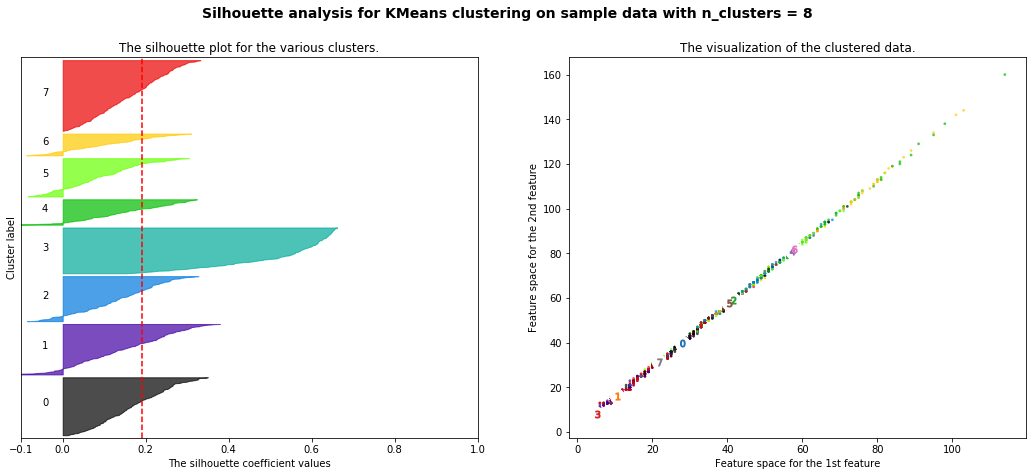

For n_clusters = 9 The average silhouette_score is : 0.19001821936979876


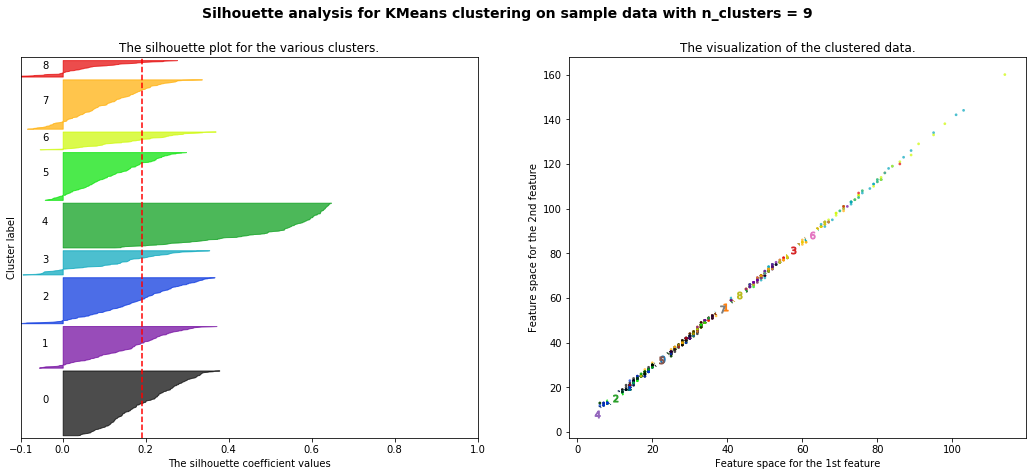

For n_clusters = 10 The average silhouette_score is : 0.18358481904022889


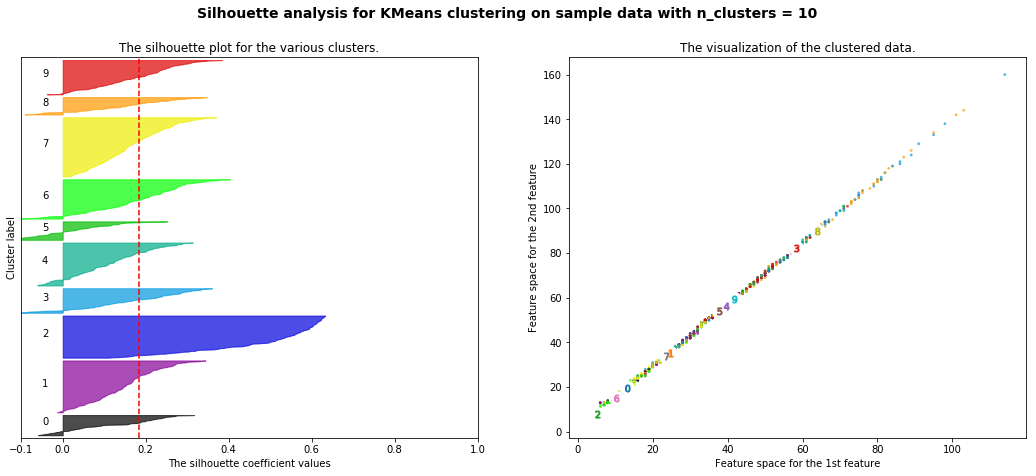

For n_clusters = 11 The average silhouette_score is : 0.18050319843575255


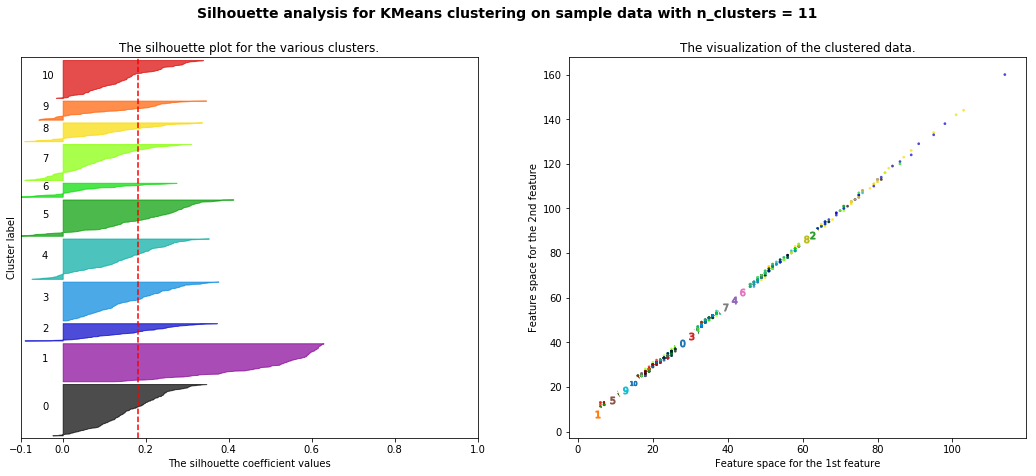

For n_clusters = 12 The average silhouette_score is : 0.16968414757466085


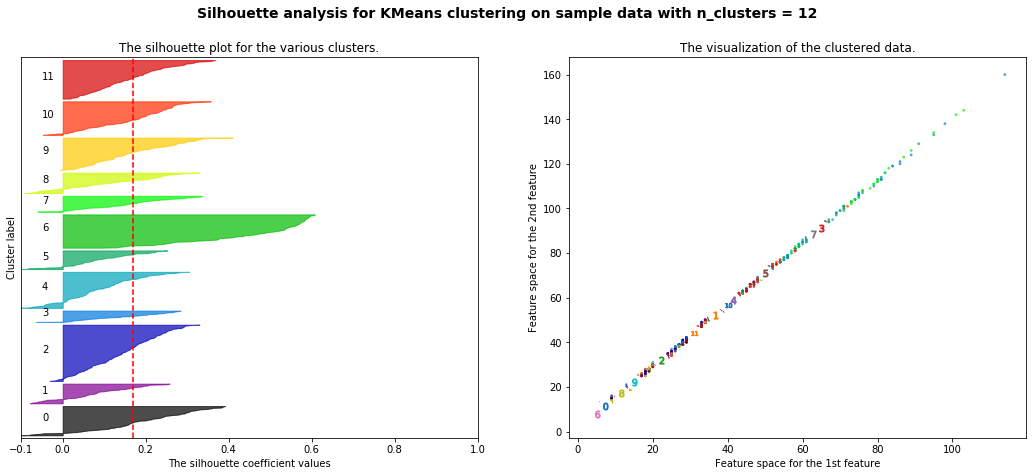

For n_clusters = 13 The average silhouette_score is : 0.16636503644476275


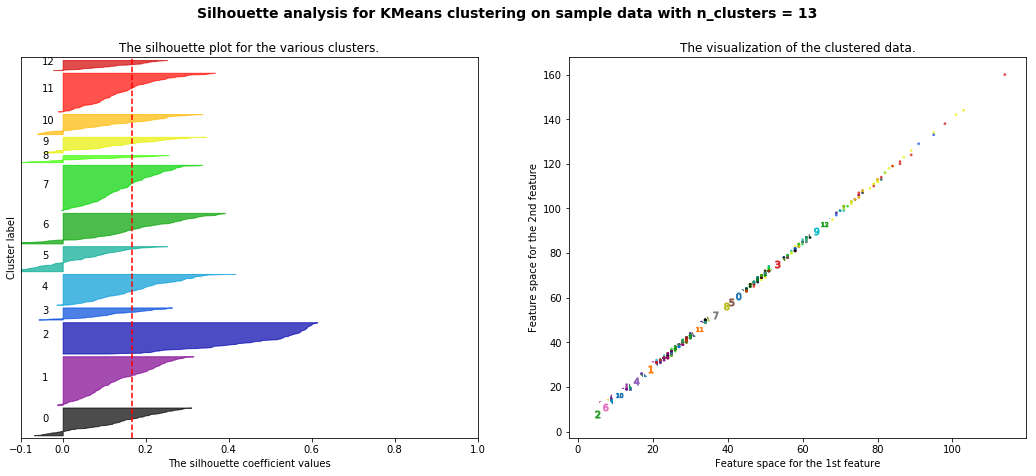

For n_clusters = 14 The average silhouette_score is : 0.16364137074967447


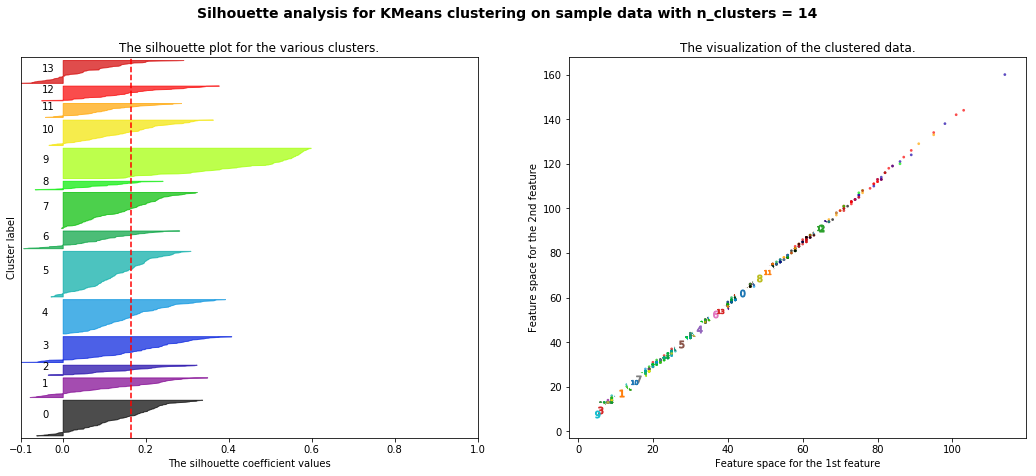

In [11]:
from helper import cluster_and_plot
for i in range(8,15):
    cluster_and_plot(X, i)